# Epic 5:

Als een key user kan ik voor een campagne een lijst met contacten genereren volgens de waarschijnlijkheid om in te schrijven voor de campagne. Ik wil in de sortering ook ervoor zorgen dat contacten met weinig marketing pressure bevoordeeld worden ten opzichte van contacten met een hoge marketing pressure. 

In [20]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame

from dotenv import load_dotenv
import os
from sqlalchemy import create_engine, MetaData
import pandas as pd

from sklearn.model_selection import train_test_split


## Database connection

In [21]:
load_dotenv()
csv_dir =  '/home/flor/Workspace/DEP2/DataEngineerProj2/Data'
SERVER = os.environ.get('SERVER')
DATABASE = os.environ.get('DATAWAREHOUSE')
UID = os.environ.get('USER') 
PWD = os.environ.get('PASSWORD')

connection_string = f'mssql+pyodbc://{UID}:{PWD}@{SERVER}/{DATABASE}?driver=ODBC+Driver+17+for+SQL+Server'
engine = create_engine(connection_string)

metadata = MetaData()
metadata.reflect(engine)

### Creating DataFrame

In [22]:
df_fact = pd.read_sql_table(table_name='FactCampagne', con=engine)
df_mail = pd.read_sql_table(table_name='DimEmail', con=engine)
df_cont = pd.read_sql_table(table_name='DimContact', con=engine)
df_cust = pd.read_sql_table(table_name='DimCustomer', con=engine)
df_date = pd.read_sql_table(table_name='DimDate', con=engine)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

df_final = pd.merge(df_fact, df_mail, on=["Mailing_ID", "Visit_ID", "Campagne_ID", "Contact_ID"])

df_final = pd.merge(df_final, df_cont, on=["Contact_ID","Persoon_ID", "Inschrijving_ID"])

df_final = pd.merge(left=df_final, right=df_cust ,on=["Customer_ID", "Persoon_ID"])

df_final['End_date_campagne'] = df_final['Eind_date_key'].map(df_date.set_index('date_Key')['date'])
df_final['Start_date_campagne'] = df_final['Start_date_key'].map(df_date.set_index('date_Key')['date'])

df_final.rename(columns={"Reden_van_status_x" : "Compleet"}, inplace=True)
df_final.drop("Reden_van_status_y", axis=1, inplace=True)

df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16206 entries, 0 to 16205
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Customer_ID             16206 non-null  object        
 1   Persoon_ID              16206 non-null  object        
 2   Contact_ID              16206 non-null  object        
 3   Inschrijving_ID         16206 non-null  object        
 4   Campagne_ID             16206 non-null  object        
 5   Mailing_ID              16206 non-null  object        
 6   Visit_ID                16206 non-null  object        
 7   Campagne_Nr             16206 non-null  object        
 8   Eind_date_key           16206 non-null  int64         
 9   Naam_Campagne           16206 non-null  object        
 10  Naam_in_email           16206 non-null  object        
 11  Compleet                16206 non-null  object        
 12  Start_date_key          16206 non-null  int64 

In [23]:
df_final.head()

,Customer_ID,Persoon_ID,Contact_ID,Inschrijving_ID,Campagne_ID,Mailing_ID,Visit_ID,Campagne_Nr,Eind_date_key,Naam_Campagne,Naam_in_email,Compleet,Start_date_key,Status_Camp,Type_campagne,Soort_Campagne,Onderwerp_campagne,Mailing_Name,Mailing_Sent_On,Mailing_Subject,IP_Stad,IP_Land,IP_Adress,IP_Organization,Account_ID,Functie_title,Contact_status,Voka_medewerker,Inschrijving_status,Bron,Datum,Facturatie_bedrag,Geografische_regio,Geografische_subregio,Plaats,Postcode,Industriezone_Naam_,Is_Voka_entiteit,Ondernemingsaard,Ondernemingstype,Oprichtingsdatum,Primaire_activiteit,Status,Voka_Nr_,Adres_Land,Persoonnr,Status_Persoon,Marketing_Communicatie,Lidmaatschap_ID,Opzeg,Reden_Aangroei,Reden_Verloop,Start_Datum,End_date_campagne,Start_date_campagne
0,E40F33E0-C268-E111-B43A-00505680000A,59586FD2-A913-E211-9DAA-005056B06EB4,90122280-58FD-E811-80F9-001DD8B72B61,1117EF05-AEE2-ED11-A7C7-6045BD895403,A2F63005-8EA8-ED11-AAD1-6045BD895D85,AD97B2C6-D6D9-ED11-A7C7-6045BD89520A,5DAB6B2C-9507-459C-8049-6B2BED9F7D78,23-OV-01-0056,20230525,OV-NW-Voka Bilan 2023,Voka's statutaire jaarvergadering & jaarfeest 2023,Voltooid,20230525,Actief,Netwerkevenement,Offline,NW,OV-NW-Bilan 2023-4 kaarten,24-4-2023,Uitnodiging: Voka Jaarfeest 2023,Oudenburg,Belgium,84.199.144.185,C5A389AF-4BED-EC11-BB3D-00224885825F,E40F33E0-C268-E111-B43A-00505680000A,Algemeen Directeur - CEO,Actief,0,Aanwezig,Website,2023-04-24,0,Oost-Vlaanderen,Oudenaarde,WORTEGEM-PETEGEM,9790,None,Nee,Productie,Familiebedrijf,15-12-1978,Bouw,Actief,22560,België,356625,Actief,Strikt,A2388D4C-F36E-E111-B43A-00505680000A,None,None,None,2007-01-01,2023-05-25,2023-05-25
1,E40F33E0-C268-E111-B43A-00505680000A,59586FD2-A913-E211-9DAA-005056B06EB4,90122280-58FD-E811-80F9-001DD8B72B61,1117EF05-AEE2-ED11-A7C7-6045BD895403,A2F63005-8EA8-ED11-AAD1-6045BD895D85,AD97B2C6-D6D9-ED11-A7C7-6045BD89520A,912DCB29-3C9A-49AB-B216-D540311CA428,23-OV-01-0056,20230525,OV-NW-Voka Bilan 2023,Voka's statutaire jaarvergadering & jaarfeest 2023,Voltooid,20230525,Actief,Netwerkevenement,Offline,NW,OV-NW-Bilan 2023-4 kaarten,24-4-2023,Uitnodiging: Voka Jaarfeest 2023,Braine-l'Alleud,Belgium,178.144.115.231,C3B89363-4BBB-ED11-83FF-6045BD895D85,E40F33E0-C268-E111-B43A-00505680000A,Algemeen Directeur - CEO,Actief,0,Aanwezig,Website,2023-04-24,0,Oost-Vlaanderen,Oudenaarde,WORTEGEM-PETEGEM,9790,None,Nee,Productie,Familiebedrijf,15-12-1978,Bouw,Actief,22560,België,356625,Actief,Strikt,A2388D4C-F36E-E111-B43A-00505680000A,None,None,None,2007-01-01,2023-05-25,2023-05-25
2,E40F33E0-C268-E111-B43A-00505680000A,59586FD2-A913-E211-9DAA-005056B06EB4,90122280-58FD-E811-80F9-001DD8B72B61,1117EF05-AEE2-ED11-A7C7-6045BD895403,A2F63005-8EA8-ED11-AAD1-6045BD895D85,AD97B2C6-D6D9-ED11-A7C7-6045BD89520A,D7A2B3AC-CD13-4133-AE66-7FB0F4E09FEE,23-OV-01-0056,20230525,OV-NW-Voka Bilan 2023,Voka's statutaire jaarvergadering & jaarfeest 2023,Voltooid,20230525,Actief,Netwerkevenement,Offline,NW,OV-NW-Bilan 2023-4 kaarten,24-4-2023,Uitnodiging: Voka Jaarfeest 2023,Uccle,Belgium,37.185.187.18,C309F35C-2BFB-ED11-8849-6045BD895D4D,E40F33E0-C268-E111-B43A-00505680000A,Algemeen Directeur - CEO,Actief,0,Aanwezig,Website,2023-04-24,0,Oost-Vlaanderen,Oudenaarde,WORTEGEM-PETEGEM,9790,None,Nee,Productie,Familiebedrijf,15-12-1978,Bouw,Actief,22560,België,356625,Actief,Strikt,A2388D4C-F36E-E111-B43A-00505680000A,None,None,None,2007-01-01,2023-05-25,2023-05-25
3,E40F33E0-C268-E111-B43A-00505680000A,59586FD2-A913-E211-9DAA-005056B06EB4,90122280-58FD-E811-80F9-001DD8B72B61,1117EF05-AEE2-ED11-A7C7-6045BD895403,A2F63005-8EA8-ED11-AAD1-6045BD895D85,AD97B2C6-D6D9-ED11-A7C7-6045BD89520A,CC7E44A6-EDF5-4536-AA39-7692A208A382,23-OV-01-0056,20230525,OV-NW-Voka Bilan 2023,Voka's statutaire jaarvergadering & jaarfeest 2023,Voltooid,20230525,Actief,Netwerkevenement,Offline,NW,OV-NW-Bilan 2023-4 kaarten,24-4-2023,Uitnodiging: Voka Jaarfeest 2023,Oudenburg,Belgium,84.199.144.185,C5A389AF-4BED-EC11-BB3D-00224885825F,E40F33E0-C268-E111-B43A-00505680000A,Algemeen Directeur - CEO,Acti

In [24]:
import datetime
id_columns = df_final[['Customer_ID', 'Persoon_ID', 'Contact_ID', 'Inschrijving_ID', 'Campagne_ID', 'Mailing_ID', 'Visit_ID', 'Account_ID', "Lidmaatschap_ID"]]
df_final_strip = df_final.drop(id_columns, axis=1)

df_final_strip["Duration"] = df_final_strip["End_date_campagne"] - df_final_strip["Start_date_campagne"]
df_final_strip["Duration"] = df_final_strip["Duration"] + datetime.timedelta(days=1)

df_final_strip.drop([
                     'Campagne_Nr',
                     'Naam_Campagne',
                     'Naam_in_email',
                     'Mailing_Subject',
                     'IP_Organization',
                     'Mailing_Name',
                     'Mailing_Sent_On',
                     'Datum',
                     'IP_Adress',
                     'Voka_Nr_',
                     'Persoonnr',
                     "Eind_date_key",
                     "Start_date_key",
                     "Postcode",
                     "Voka_medewerker",
                     "Compleet",
                     "Status_Camp",
                     "Contact_status",
                     "Is_Voka_entiteit",
                     "Status_Persoon",
                     "Adres_Land",
                     "Status",
                     "Start_Datum",
                     "Oprichtingsdatum",
                     "End_date_campagne",
                     "Start_date_campagne"
                     ], axis=1, inplace=True)





# print(df_final_strip.info())
df_final_strip.head(5)

,Type_campagne,Soort_Campagne,Onderwerp_campagne,IP_Stad,IP_Land,Functie_title,Inschrijving_status,Bron,Facturatie_bedrag,Geografische_regio,Geografische_subregio,Plaats,Industriezone_Naam_,Ondernemingsaard,Ondernemingstype,Primaire_activiteit,Marketing_Communicatie,Opzeg,Reden_Aangroei,Reden_Verloop,Duration
0,Netwerkevenement,Offline,NW,Oudenburg,Belgium,Algemeen Directeur - CEO,Aanwezig,Website,0,Oost-Vlaanderen,Oudenaarde,WORTEGEM-PETEGEM,None,Productie,Familiebedrijf,Bouw,Strikt,None,None,None,1 days
1,Netwerkevenement,Offline,NW,Braine-l'Alleud,Belgium,Algemeen Directeur - CEO,Aanwezig,Website,0,Oost-Vlaanderen,Oudenaarde,WORTEGEM-PETEGEM,None,Productie,Familiebedrijf,Bouw,Strikt,None,None,None,1 days
2,Netwerkevenement,Offline,NW,Uccle,Belgium,Algemeen Directeur - CEO,Aanwezig,Website,0,Oost-Vlaanderen,Oudenaarde,WORTEGEM-PETEGEM,None,Productie,Familiebedrijf,Bouw,Strikt,None,None,None,1 days
3,Netwerkevenement,Offline,NW,Oudenburg,Belgium,Algemeen Directeur - CEO,Aanwezig,Website,0,Oost-Vlaanderen,Oudenaarde,WORTEGEM-PETEGEM,None,Productie,Familiebedrijf,Bouw,Strikt,None,None,None,1 days
4,Netwerkevenement,Offline,NW,Uccle,Belgium,Algemeen Directeur - CEO,Aanwezig,Website,0,Oost-Vlaanderen,Oudenaarde,WORTEGEM-PETEGEM,None,Productie,Familiebedrijf,Bouw,Strikt,None,None,None,1 days


## Data Preprocessing


### Handling Text and Categorical Attributes

In [25]:
df_final_strip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16206 entries, 0 to 16205
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Type_campagne           16206 non-null  object         
 1   Soort_Campagne          16206 non-null  object         
 2   Onderwerp_campagne      16206 non-null  object         
 3   IP_Stad                 16166 non-null  object         
 4   IP_Land                 16166 non-null  object         
 5   Functie_title           15755 non-null  object         
 6   Inschrijving_status     16206 non-null  object         
 7   Bron                    16206 non-null  object         
 8   Facturatie_bedrag       16206 non-null  object         
 9   Geografische_regio      16206 non-null  object         
 10  Geografische_subregio   16206 non-null  object         
 11  Plaats                  16206 non-null  object         
 12  Industriezone_Naam_     6281 non

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

df_final_strip["Facturatie_bedrag"] = df_final_strip["Facturatie_bedrag"].str.replace(",", ".").astype(float)

X = pd.DataFrame(df_final_strip.drop("Inschrijving_status", axis=1))
y = pd.DataFrame(df_final_strip["Inschrijving_status"])

# Separate categorical and numerical columns
cat_attribs = X.select_dtypes(include=['object']).columns
num_attribs = X.select_dtypes(include=["int64", 'float64', 'int', 'float']).columns

# Categorical pipeline
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='constant', fill_value='missing')),
    ("encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Numerical pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Column transformer
prep = ColumnTransformer([
    ('cat', cat_pipeline, cat_attribs),
    ('num', num_pipeline, num_attribs)
], remainder='drop')

y = cat_pipeline.fit_transform(y)

# # Convert numpy array back to DataFrame
# df_final_strip = pd.DataFrame(df_final_strip, columns=list(cat_attribs) + list(num_attribs))

# # Apply transformations
# df_final_transformed = prep.fit_transform(df_final_strip)

# # Create DataFrame from the transformed data
# df_final_transformed = pd.DataFrame(df_final_transformed, columns=list(cat_attribs) + list(num_attribs))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)


In [10]:
# df_final_transformed.head()

In [11]:
# corr_matrix = df_final_transformed.corr()
# corr_matrix["Inschrijving_status"].sort_values(ascending=False)

## Select and Train a Model

### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight={0: 10, 1: 9},n_estimators=50,max_depth=10,random_state=42, n_jobs=10)

In [27]:
rfc.fit(X_train, y_train)

TypeError: Feature names are only supported if all input features have string names, but your input has ['quoted_name', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

y_pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rfc)
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc)
roc_auc = roc_auc_score(y_test, y_pred_rfc)

print(classification_report(y_test, y_pred_rfc))
print("*"*50)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

print(X_test.shape)
print("*"*50)
print(sum(y_test==True))
print("*"*50)
matrix = confusion_matrix(y_test, y_pred_rfc)
print(matrix.diagonal()/matrix.sum(axis=1))
print("*"*50)
print(matrix)



              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3945
         1.0       1.00      0.29      0.45       107

    accuracy                           0.98      4052
   macro avg       0.99      0.64      0.72      4052
weighted avg       0.98      0.98      0.98      4052

**************************************************
Accuracy: 0.981243830207305
Precision: 1.0
Recall: 0.2897196261682243
F1 Score: 0.4492753623188406
ROC AUC Score: 0.6448598130841121
(4052, 19)
**************************************************
107
**************************************************
[1.         0.28971963]
**************************************************
[[3945    0]
 [  76   31]]


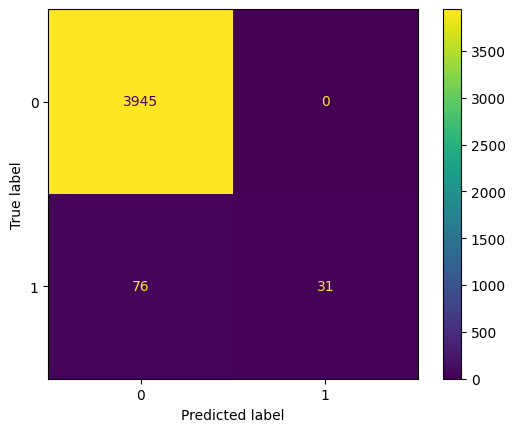

In [ ]:
#RFC WITH class weights
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()

Grid Search CV, Boosting, Stacking

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param = {
#     'class_weight': [{0:x, 1:w} for w in [9,10,11,12,13,14,15] for x in [5,6,7,8,9,10]],
#     'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
#     'max_depth' : [1, 10, 20, 30, 40, 50]
#     }

# grid = GridSearchCV(RandomForestClassifier(random_state=42), param, verbose=True, n_jobs=10)


In [ ]:
# grid.fit(X_train, y_train)
# y_pred_grid = grid.predict(X_test)

In [ ]:
# print(grid.best_params_)

In [ ]:
# print(classification_report(y_test, y_pred_grid))
# ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_grid)).plot()

In [ ]:
# X_train.info()

In [14]:
from sklearn.pipeline import make_pipeline
rfc = make_pipeline(prep, RandomForestClassifier(class_weight={0: 0.1, 1: 25},n_estimators=20,max_depth=20,random_state=42, n_jobs=10))

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

TypeError: Feature names are only supported if all input features have string names, but your input has ['quoted_name', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [28]:
from sklearn.pipeline import make_pipeline
rfc = Pipeline([('prep', prep), ('rfc', RandomForestClassifier(class_weight={0: 0.1, 1: 25}, n_estimators=20, max_depth=20, random_state=42, n_jobs=10))])

X = X.rename(str,axis="columns") 


rfc.fit(X, y)

# X_train.head()e

# y_pred = rfc.predict(X_test)


/home/flor/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index(['Type_campagne', 'Soort_Campagne', 'Onderwerp_campagne', 'IP_Stad',
       'IP_Land', 'Functie_title', 'Bron', 'Geografische_reg...
       'Ondernemingsaard', 'Ondernemingstype', 'Primaire_activiteit',
       'Marketing_Communicatie', 'Opzeg', 'Reden_Aangroei', 'Reden_Verloop'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Facturatie_bedrag'], dtype='object'))])),
                ('rfc',
                 RandomForestClassifier(class_weight={0: 0.1, 1: 25},
                                        max_depth=20, n_estimators=20,
                                        n_jobs=10, random_state=42))])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rfc)
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc)
roc_auc = roc_auc_score(y_test, y_pred_rfc)

print(classification_report(y_test, y_pred_rfc))
print("*"*50)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

print(X_test.shape)
print("*"*50)
print(sum(y_test==True))
print("*"*50)
matrix = confusion_matrix(y_test, y_pred_rfc)
print(matrix.diagonal()/matrix.sum(axis=1))
print("*"*50)
print(matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, normalize="true", values_format=".0%")
disp.plot()



NameError: name 'rfc' is not defined

In [29]:
from joblib import dump

dump(rfc, "campagne_rfc.joblib")

['campagne_rfc.joblib']